# What is Linear Regression?

## Introduction

Linear Regression is one of the most basic and widely used algorithms in machine learning. It’s used to model the relationship between a **dependent variable** (what we want to predict) and one or more **independent variables** (the inputs). The goal is to find the best-fitting straight line that captures the trend in the data, so we can make predictions based on new input values.



This method is especially common in areas like finance, economics, and anywhere else where spotting patterns and making forecasts is useful.

Linear Regression finds a straight-line relationship between the inputs (X) and the output (Y). The general form of the equation is:

$Y = mx + b$

Where:

- **Y** is the predicted value (output)  
- **X** is the input value  
- **m** is the slope of the line (how much Y changes for each unit of X)  
- **b** is the intercept (the value of Y when X is 0)

To minimize the MSE, methods like **Ordinary Least Squares (OLS)** or **Gradient Descent** are used to update the values of **m** and **b** during training.


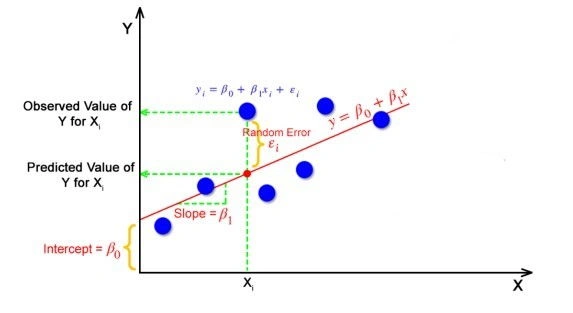
## Evaluating Model Performance

To see how well the model works, we use a few common evaluation metrics:

- **R-squared (R²)**: Tells us how much of the variation in the output is explained by the input(s). Values close to 1 mean a strong fit.
- **Mean Squared Error (MSE)**: Measures the average of the squared prediction errors. Lower is better.
- **Mean Absolute Error (MAE)**: Measures the average absolute difference between predicted and actual values. Also, lower is better.

Each of these metrics helps us understand how accurate and useful our regression model is.

In [ ]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

!pip install -U imbalanced-learn
from imblearn.over_sampling import SMOTE


filename = r"C:\Users\pjs5\Downloads\diabetes_dataset_with_notes.csv"
df = pd.read_csv(filename)

df = df.drop(columns=['year', 'clinical_notes'])
df = pd.get_dummies(df, drop_first=True)

X = df.drop(columns=['diabetes'])
y = df['diabetes']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=14)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train_balanced, y_train_balanced)

y_pred = lr.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared Score:", r2_score(y_test, y_pred))

Saving diabetes_dataset_with_notes.csv to diabetes_dataset_with_notes.csv
Mean Squared Error: 0.05964115599717726
R-squared Score: 0.23438310613601654


This R-Squared value is extremely low, indicating that the linear regression model is very poor in predicting whether or not somebody has diabetes

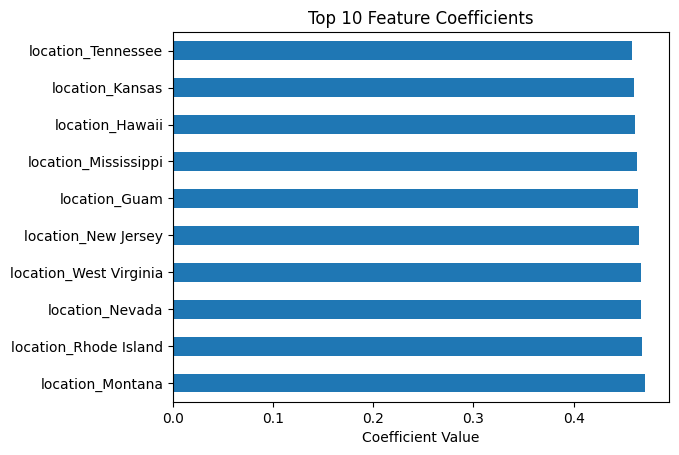

In [ ]:
coef_series = pd.Series(lr.coef_, index=X.columns)
coef_series.nlargest(10).plot(kind='barh', title="Top 10 Feature Coefficients")
plt.xlabel('Coefficient Value')
plt.show()

This model assigns the largest magnitude coefficients to locations not any causal predictors of diabetes which helps explain why the model performance is so poor. By the fact that this data mostly contains binary data, this could help explain why a linear model is not performing well.
